In [1]:
#Getting all the necessary imports
import numpy as np
import pandas as pd
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch
import os

In [2]:
data_folder = Path("../input/smog4000/smog4000/Smog4000/")
trfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)

In [3]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [4]:
data = (ImageList.from_folder(data_folder)
        .split_by_folder()
        .label_from_folder()
        .add_test_folder("../input/smog4000/smog4000/Smog4000/test")
        .transform(trfms, size=128)
        .databunch(bs=64, device= torch.device('cuda:0'))
        .normalize())

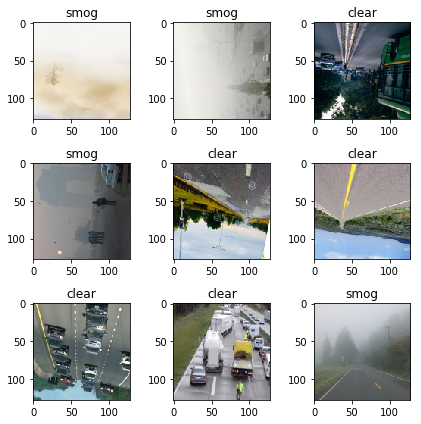

In [5]:
#Testing the data loader
data.show_batch(3, figsize=(6,6), hide_axis=False)

In [6]:
learn = cnn_learner(data, models.resnet101, metrics=[error_rate, accuracy], model_dir = os.getcwd())

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /tmp/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [00:01<00:00, 147MB/s]


In [7]:
#learn.lr_find(stop_div=False, num_it=200)

In [8]:
#learn.recorder.plot(suggestion = True)
#min_grad_lr = learn.recorder.min_grad_lr

In [9]:
lr = 1e-03
learn.fit_one_cycle(30, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.481305,0.172133,0.059375,0.940625,01:02
1,0.306919,0.101612,0.035937,0.964063,00:58
2,0.216132,0.080292,0.029687,0.970312,00:58
3,0.173186,0.072987,0.018750,0.981250,00:58
4,0.153161,0.064370,0.017188,0.982813,00:58
5,0.141700,0.040284,0.012500,0.987500,00:58
6,0.125741,0.059066,0.015625,0.984375,00:59
7,0.115852,0.036893,0.014062,0.985937,00:57
8,0.100739,0.039276,0.015625,0.984375,00:58
9,0.096577,0.046880,0.015625,0.984375,00:57


In [10]:
learn.path = Path()

In [11]:
learn.export()

In [12]:
ls

__notebook__.ipynb  __output__.json  export.pkl
